In [2]:
import re
import pandas as pd
from os import path
from collections import Counter
from glob import glob
from lxml import etree
from tqdm import tqdm

In [3]:
def canon(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//profileDesc") is not None:
            profil = tree.find(".//profileDesc")
            if profil.get("tag") == "canon":
                return True
            else:
                return False

In [4]:
def gender(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//author") is not None:
            profil = tree.find(".//author")
            return profil.get("sex")         

In [5]:
def moulinette(path_name):
    
    df_corpus = pd.DataFrame([], columns=["doc_name", "date", "auteur", "titre", "canon", "gender"])
    
    for doc in tqdm(glob(path_name)):
        
        doc_name = path.splitext(path.basename(doc))[0]
        #print(doc_name)
        date = doc_name.split("_")[0]
        auteur = doc_name.split("_")[1]
        titre = doc_name.split("_")[2].split('FC')[0] # weird title metadata (corpus)
        tag = canon(doc)
        tag_gender = gender(doc)
        #if tag_gender != 'male' and  tag_gender != 'female':
        #    print(doc)
        df_roman = pd.DataFrame([(doc_name, date, auteur, titre, tag, tag_gender)], columns=["doc_name", "date", "auteur", "titre", "canon", "gender"])
        #df_corpus = df_corpus.append(df_roman, ignore_index = True) DEPRECIATED
        df_corpus = pd.concat([df_corpus, df_roman])
    return df_corpus

In [6]:
path_name = r'C:\Users\jeanb\Documents\m2\memoire_master\canonization_process\corpus_chapitres\*.xml'

In [7]:
df_corpus = moulinette(path_name)

100%|██████████| 2966/2966 [01:07<00:00, 44.20it/s]


In [8]:
df_corpus

,doc_name,date,auteur,titre,canon,gender
0,1811_Chateaubriand-François-Rene-de_Oeuvres-co...,1811,Chateaubriand-François-Rene-de,Oeuvres-completes,True,male
0,1812_Kock-Paul-de_L-enfant-de-ma-femme,1812,Kock-Paul-de,L-enfant-de-ma-femme,False,male
0,1815_Gay-Sophie_Anatole_Vol-1,1815,Gay-Sophie,Anatole,False,female
0,1815_Gay-Sophie_Anatole_Vol-2,1815,Gay-Sophie,Anatole,False,female
0,1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge...,1816,Barthelemy-Hadot-Marie-Adelaide,La-Vierge-de-l-Indostan-ou-les-Portugais-au-Ma...,False,female
...,...,...,...,...,...,...
0,2018_Quignard-Pascal_L-enfant-d_Ingolstadt_Der...,2018,Quignard-Pascal,L-enfant-d,True,male
0,2019_Dabos-Christelle_La-Passe-miroir-4-La-Tem...,2019,Dabos-Christelle,La-Passe-miroir-4-La-Tempete-des-echos,False,female
0,2019_Murail-Marie-Aude_Sauveur-Fils-Saison-5,2019,Murail-Marie-Aude,Sauveur-Fils-Saison-5,False,female
0,2020_Melois-Clementine_Dehors-la-tempete,2020,Melois-Clementine,Dehors-la-tempete,False,female


In [9]:
df_corpus.gender.value_counts(normalize=True)

male       0.782198
female     0.212070
           0.003372
unknown    0.002023
?          0.000337
Name: gender, dtype: float64

In [10]:
def net_auteur(liste_auteur):
    liste_result = []
    for auteur in liste_auteur:
        string_result = " "
        auteur_net = re.sub("-", " ", auteur)
        auteur_net_list = auteur_net.split(" ")
        auteur_new_order_list = auteur_net_list[-(len(auteur_net_list)-1):] + auteur_net_list[:-(len(auteur_net_list)-1)] 
        liste_result.append(string_result.join(auteur_new_order_list).lower()) 
    return liste_result

In [11]:
liste_auteur = net_auteur(list(df_corpus["auteur"]))

In [12]:

def net_title(liste_titre):
    liste_result = []
    for titre in liste_titre:
        temp = re.sub("-", " ", titre)
        liste_result.append(temp.lower()) 
    return liste_result

In [13]:
liste_titre = net_title(list(df_corpus["titre"]))

In [14]:
liste_titre

['oeuvres completes',
 'l enfant de ma femme',
 'anatole',
 'anatole',
 'la vierge de l indostan ou les portugais au malabar',
 'la vierge de l indostan ou les portugais au malabar',
 'la vierge de l indostan ou les portugais au malabar',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'adolphe',
 'les venitiens ou le capitaine français',
 'les venitiens ou le capitaine français',
 'les venitiens ou le capitaine français',
 'laurence de sully ou l ermitage en suisse',
 'laurence de sully ou l ermitage en suisse',
 'laurence de sully ou l ermitage en suisse',
 'le solitaire',
 'le renégat',
 'charles victor',
 'han d islande',
 'ourika',
 'le page et la romance',
 'd',
 'voyage d un jeune grec a paris',
 'voyage d un jeune grec a paris',
 'le monastere des freres noirs',
 'edouard',
 'gustave et aspais ou les victimes des prejuges de l epoque',
 'gustave et aspais ou 

In [15]:
df_corpus["auteur"] = liste_auteur

In [16]:
df_corpus["titre"] = liste_titre

In [17]:
df_corpus.rename(columns = {'canon':'fabula'}, inplace = True)

In [18]:
df_corpus['canon'] = ['canon' if elem == True else 'non-canon' for elem in df_corpus["fabula"]]

In [19]:
df_corpus.to_csv(r'corpus.csv', index = False, header=True)

In [20]:
df_corpus

,doc_name,date,auteur,titre,fabula,gender,canon
0,1811_Chateaubriand-François-Rene-de_Oeuvres-co...,1811,françois rene de chateaubriand,oeuvres completes,True,male,canon
0,1812_Kock-Paul-de_L-enfant-de-ma-femme,1812,paul de kock,l enfant de ma femme,False,male,non-canon
0,1815_Gay-Sophie_Anatole_Vol-1,1815,sophie gay,anatole,False,female,non-canon
0,1815_Gay-Sophie_Anatole_Vol-2,1815,sophie gay,anatole,False,female,non-canon
0,1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge...,1816,hadot marie adelaide barthelemy,la vierge de l indostan ou les portugais au ma...,False,female,non-canon
...,...,...,...,...,...,...,...
0,2018_Quignard-Pascal_L-enfant-d_Ingolstadt_Der...,2018,pascal quignard,l enfant d,True,male,canon
0,2019_Dabos-Christelle_La-Passe-miroir-4-La-Tem...,2019,christelle dabos,la passe miroir 4 la tempete des echos,False,female,non-canon
0,2019_Murail-Marie-Aude_Sauveur-Fils-Saison-5,2019,marie aude murail,sauveur fils saison 5,False,female,non-canon
0,2020_Melois-Clementine_Dehors-la-tempete,2020,clementine melois,dehors la tempete,False,female,non-canon


### Gender disparities in our corpora

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

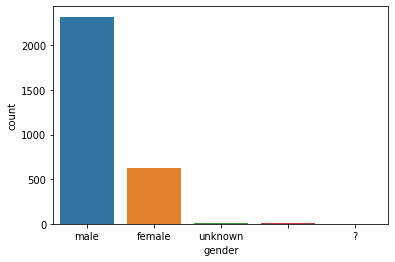

In [31]:
sns.countplot(data=df_corpus, x="gender")

<AxesSubplot:xlabel='gender', ylabel='count'>

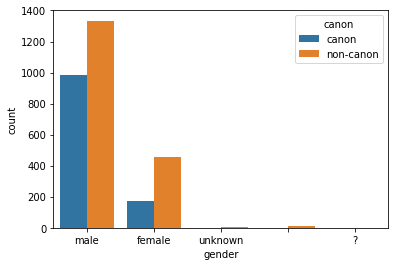

In [32]:
sns.countplot(data=df_corpus, x="gender", hue="canon")

### NB ROMAN PAR AUTEUR

In [108]:
auteur_prolifique = list(df_corpus["auteur"].value_counts().index.to_list())

In [114]:
nb_roman = list(df_corpus["auteur"].value_counts().to_list())

In [116]:
df_auteur_prolifique = pd.DataFrame(list(zip(auteur_prolifique, nb_roman)), columns = ['auteur', "nb_roman"])

In [119]:
df_auteur_prolifique.to_csv(r'auteurs_prolifiques.csv', index = False, header=True)

In [98]:
df_corpus["auteur"].value_counts(normalize=True)*100

delly                  3.208376
antonio san            3.039514
alexandre dumas        2.971969
honore de balzac       2.870652
georges simenon        2.701790
                         ...   
alfred jarry           0.033772
paule constant         0.033772
charles de ribelle     0.033772
francis wey            0.033772
comtesse de sannois    0.033772
Name: auteur, Length: 714, dtype: float64

In [23]:
df_auteur_canon = pd.read_csv(r'..\metadata\auteur_canon.csv')

In [24]:
df_auteur_canon

,auteur,nb_romans
0,honore de balzac,19
1,emile zola,17
2,romain rolland,10
3,de maupassant guy,10
4,alexandre dumas,8
...,...,...
125,catherine cusset,1
126,annie ernaux,1
127,alice ferney,1
128,chatrian erckmann,1


In [4]:
df_corpus_canonized = pd.read_csv(r'..\metadata\corpus_canons.csv')

In [5]:
df_corpus_canonized

,date,auteur,titre,fabula,canon
0,1811,françois rene de chateaubriand,oeuvres completes,True,canon
1,1812,paul de kock,l enfant de ma femme,False,non_canon
2,1815,sophie gay,anatole,False,non_canon
3,1815,sophie gay,anatole,False,non_canon
4,1816,hadot marie adelaide barthelemy,la vierge de l indostan ou les portugais au ma...,False,non_canon
...,...,...,...,...,...
2956,2018,pascal quignard,l enfant d ingolstadt,True,non_canon
2957,2019,christelle dabos,la passe miroir,False,non_canon
2958,2019,marie aude murail,sauveur fils,False,non_canon
2959,2020,clementine melois,dehors la tempete,False,non_canon


In [21]:
auteur_nd_roman = df_corpus_canonized.auteur.value_counts().tolist()

In [19]:
auteur = df_corpus_canonized.auteur.value_counts().index.tolist()

In [25]:
dictionary = dict(zip(auteur, auteur_nd_roman))
print(dictionary)

{'delly': 95, 'antonio san': 90, 'alexandre dumas': 88, 'honore de balzac': 85, 'georges simenon': 80, 'paul feval': 59, 'george sand': 51, 'maurice leblanc': 33, 'henry greville': 32, 'gaston leroux': 32, 'pierre loti': 31, 'du terrail pierre ponson': 29, 'jules verne': 28, 'michel zevaco': 27, 'max du veuzit': 27, 'eugene sue': 26, 'emile zola': 22, 'alphonse daudet': 21, 'patrick modiano': 21, 'didier daeninckx': 21, 'de maupassant guy': 21, 'pierre bergounioux': 20, 'chatrian erckmann': 20, 'emile gaboriau': 19, 'rene bazin': 18, 'anatole france': 18, 'colette': 18, 'amelie nothomb': 17, 'hector malot': 17, 'rouge gustave le': 16, 'jean echenoz': 16, 'paul bourget': 16, 'richard millet': 16, 'gustave aimard': 14, 'julie gouraud': 14, 'fortune du boisgobey': 14, 'daniel lesueur': 14, 'arsene houssaye': 14, 'alphonse allais': 13, 'louis ulbach': 13, 'victor hugo': 12, 'pascal quignard': 12, 'romain rolland': 12, 'du terrail pierre alexis de ponson': 12, 'h emile chevalier': 11, 'paul

In [27]:
def nb_roman_par_auteur(df_auteur_canon, dict_corpus):
    df_res = df_auteur_canon
    list_nb_roman_total = []
    for auteur in df_res['auteur']:
        if auteur in dict_corpus.keys():
            list_nb_roman_total.append(dict_corpus[auteur])
        else:
            print("PAS NORMAL")
    df_res['nb_romans_total'] = list_nb_roman_total
    return df_res

In [28]:
df_res = nb_roman_par_auteur(df_auteur_canon, dictionary)

In [29]:
df_res

,auteur,nb_romans,nb_romans_total
0,honore de balzac,19,85
1,emile zola,17,22
2,romain rolland,10,12
3,de maupassant guy,10,21
4,alexandre dumas,8,88
...,...,...,...
125,catherine cusset,1,2
126,annie ernaux,1,8
127,alice ferney,1,6
128,chatrian erckmann,1,20


In [37]:
df_res.to_csv((r'..\metadata\auteur_canon.csv'))

In [38]:
print(df_res.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
                              auteur &  nb\_romans &  nb\_romans\_total \\
\midrule
                    honore de balzac &         19 &               85 \\
                          emile zola &         17 &               22 \\
                      romain rolland &         10 &               12 \\
                   de maupassant guy &         10 &               21 \\
                     alexandre dumas &          8 &               88 \\
                         victor hugo &          8 &               12 \\
      françois rene de chateaubriand &          7 &                7 \\
                             colette &          5 &               18 \\
                         jules verne &          4 &               28 \\
                     alphonse daudet &          4 &               21 \\
                         george sand &          4 &               51 \\
                            stendhal &          4 &                7 \\
                      

<ipython-input-38-7e8b67510a63>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.to_latex(index=False))


## RENAME texts from corpus 

In [42]:
import os

In [43]:
os.getcwd()

'C:\\Users\\jeanb\\Documents\\m2\\memoire_master\\canonization_process\\notebook_metadata'

In [45]:
folder_path = r'C:\\Users\\jeanb\\Documents\\m2\\memoire_master\\canonization_process\\notebook_metadata'

In [46]:
cible_path = r'C:\\Users\\jeanb\\Documents\\m2\\memoire_master\\canonization_process\\corpus_chapitres'

In [47]:
os.chdir(cible_path)

In [48]:
#attention fan'tome' et les nombres -> bug mais 20 occurences => a la main

In [49]:
def rename_romans(corpus_path):
    for name_folder in os.listdir(corpus_path):
        for i in range(0, len(name_folder)-4):
            if name_folder[i] == '-' and name_folder[i+1] == '(' or name_folder[i+1] in ['i','I','1','v', 'V', '2', '3', '4', '5', '6', '7', '8','9'] and name_folder[i+2] in ['i', 'I', '-','v', 'V','o'] and name_folder[i+3] in ['i', 'I', '-','v', 'V','l'] or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'tome' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'Tome' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'volu' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'Volu':
                name_folder_modif = name_folder[:i]+'_'+name_folder[i+1:]
                print(name_folder, name_folder_modif)
                os.rename(name_folder, name_folder_modif)
                break;

In [50]:
rename_romans(cible_path)

1815_Gay-Sophie_Anatole-Vol-1.xml 1815_Gay-Sophie_Anatole_Vol-1.xml
1815_Gay-Sophie_Anatole-Vol-2.xml 1815_Gay-Sophie_Anatole_Vol-2.xml
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1).xml 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-1).xml
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2).xml 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-2).xml
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4).xml 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-4).xml
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-1.xml 1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes_Tome-1.xml
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-R

1841_Barbey-d-Aurevilly-Jules_L-amour-impossible.xml 1841_Barbey-d-Aur_villy-Jules_L-amour-impossible.xml
1841_Sand-Georges_Le-compagnon-du-tour-de-France_tome-2.xml 1841_Sand-Georges_Le-compagnon-du-tour-de-France_tome-2.xml
1841_Sand-George_Le-compagnon-du-tour-de-France_tome-1.xml 1841_Sand-George_Le-compagnon-du-tour-de-France_tome-1.xml
1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena-Volume-1.xml 1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena_Volume-1.xml
1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena-Volume-2.xml 1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena_Volume-2.xml
1842_Hugo-Victor_Le-Rhin-Tome-III.xml 1842_Hugo-Victor_Le-Rhin_Tome-III.xml
1842_Hugo-Victor_Le-Rhin-Tome-IV.xml 1842_Hugo-Victor_Le-Rhin_Tome-IV.xml
1842_Karr-Alphonse_Midi-a-quatorze-heures-Histoire-d-un-voisin—Voyage-dans-Paris—Une-visite-a-l-Arsenal—Un-homme-et-une-femme.xml 1842_Karr-Alphonse_Midi-a-quatorze-heures-Histoire-d-un_voisin—Voyage-dans-Paris—Une-visite-a-l-Arsenal—Un-homme-et-une-femme.xml
1842_Sue-Eugen

1857_Feval-Paul-(pere)_Le-Bossu.xml 1857_Feval-Paul_(pere)_Le-Bossu.xml
1857_Feval-Paul-(pere)_Les-Compagnons-du-Silence-I.xml 1857_Feval-Paul_(pere)_Les-Compagnons-du-Silence-I.xml
1857_Feval-Paul-(pere)_Les-Compagnons-du-Silence-II.xml 1857_Feval-Paul_(pere)_Les-Compagnons-du-Silence-II.xml
1857_Feval-Paul-(pere)_Les-Errants-de-la-nuit.xml 1857_Feval-Paul_(pere)_Les-Errants-de-la-nuit.xml
1857_Ulbach-Louis_Les-Roues-sans-le-savoir.xml 1857_Ulbach-Louis_Les-Roues-sans-le-s_voir.xml
1858_Feval-Paul-(pere)_La-fabrique-de-mariages-Vol-I.xml 1858_Feval-Paul_(pere)_La-fabrique-de-mariages-Vol-I.xml
1858_Feval-Paul-(pere)_La-fabrique-des-mariages-Vol-II.xml 1858_Feval-Paul_(pere)_La-fabrique-des-mariages-Vol-II.xml
1858_Pressense-Elise-de_Rosa-par-Mme-E-de-Pressense-(1858).xml 1858_Pressense-Elise-de_Rosa-par-Mme-E-de-Pressense_(1858).xml
1859_Feval-Paul-(pere)_La-Maison-de-Pilate.xml 1859_Feval-Paul_(pere)_La-Maison-de-Pilate.xml
1859_Feval-Paul-(pere)_Le-Roi-des-gueux.xml 1859_Feval-Paul_

1879_Hervilly-Ernest-d-_Ernest-d-Hervilly-Histoires-de-mariages.xml 1879_He_villy-Ernest-d-_Ernest-d-Hervilly-Histoires-de-mariages.xml
1879_Houssaye-Arsene_Arsene-Houssaye-L-Eventail-brise-Volume-1-Regina.xml 1879_Houssaye-Arsene_Arsene-Houssaye-L-Eventail-brise_Volume-1-Regina.xml
1879_Ponson-du-Terrail-Pierre_Le-Serment-des-Hommes-Rouges-Aventures-d-un-enfant-de-Paris-tome-2.xml 1879_Ponson-du-Terrail-Pierre_Le-Serment-des-Hommes-Rouges-Aventures-d-un-enfant-de-Paris_tome-2.xml
1879_Vignon-Claude_Revoltee.xml 1879_Vignon-Claude_R_voltee.xml
1880_Deslys-Charles_L-ami-du-village.xml 1880_Deslys-Charles_L-ami-du_village.xml
1880_Feval-Paul-(pere)_L-homme-sans-bras.xml 1880_Feval-Paul_(pere)_L-homme-sans-bras.xml
1880_Feval-Paul-(pere)_Une-histoire-de-revenants.xml 1880_Feval-Paul_(pere)_Une-histoire-de-revenants.xml
1880_Greville-Henry_Cite-Menard.xml 1880_Gr_ville-Henry_Cite-Menard.xml
1880_Greville-Henry_Croquis.xml 1880_Gr_ville-Henry_Croquis.xml
1880_Greville-Henry_Le-moulin-Frappi

1902_Le-Rouge-Gustave_La-Princesse-des-airs-Tome-II.xml 1902_Le-Rouge-Gustave_La-Princesse-des-airs_Tome-II.xml
1903_Adam-Paul_Au-soleil-de-juillet-(1829-1830).xml 1903_Adam-Paul_Au-soleil-de-juillet_(1829-1830).xml
1903_Colette_Claudine-s-en-va-(Journal-d-Annie).xml 1903_Colette_Claudine-s-en-va_(Journal-d-Annie).xml
1903_Loti-Pierre_L-Inde-(sans-les-Anglais).xml 1903_Loti-Pierre_L-Inde_(sans-les-Anglais).xml
1903_Nion-François_Bellefleur-roman-d'un-comedien-au-XVIIe-siecle_remastered.xml 1903_Nion-François_Bellefleur-roman-d'un-comedien-au-_VIIe-siecle_remastered.xml
1904_Rolland-Romain_Jean-Christophe-Tome-I-L-aube.xml 1904_Rolland-Romain_Jean-Christophe_Tome-I-L-aube.xml
1904_Rolland-Romain_Jean-Christophe-Tome-II-Le-matin.xml 1904_Rolland-Romain_Jean-Christophe_Tome-II-Le-matin.xml
1904_Rolland-Romain_Jean-Christophe-Tome-III-L-adolescent.xml 1904_Rolland-Romain_Jean-Christophe_Tome-III-L-adolescent.xml
1905_Cazin-Jeanne-(Mme)_Les-Saltimbanques-scenes-de-la-montagne.xml 1905_Cazin

1981_Villard-Marc_Corvette-de-nuit.xml 1981_Villard-Marc_Corvette-de-nuit.xml
1982_Le-Clezio-Jean-Marie-Gustave_La-ronde-et-autres-faits-divers.xml 1982_Le-Cle_io-Jean-Marie-Gustave_La-ronde-et-autres-faits-divers.xml
1985_Villard-Marc_Le-sentier-de-la-guerre.xml 1985_Villard-Marc_Le-sentier-de-la-guerre.xml
1987_Chevillard-Eric_Mourir-m-enrhume.xml 1987_Ch_villard-Eric_Mourir-m-enrhume.xml
1987_Rolin-Olivier_Bar-des-flots-noirs.xml 1987_Rolin-O_ivier_Bar-des-flots-noirs.xml
1987_Villard-Marc_Rebelles-de-la-nuit.xml 1987_Villard-Marc_Rebelles-de-la-nuit.xml
1988_Bergounioux-Pierre_L-arbre-sur-la-riviere.xml 1988_Bergounioux-Pierre_L-arbre-sur-la-_iviere.xml
1989_Villard-Marc_La-dame-est-une-trainee.xml 1989_Villard-Marc_La-dame-est-une-trainee.xml
1990_Volodine-Antoine_Lisbonne-derniere-marge.xml 1990_Volodine-Antoine_Lisbonne-derniere-marge.xml
1993_Carrere-Emmanuel_je-suis-vivant-et-vous-etes-morts.xml 1993_Carrere-Emmanuel_je-suis_vivant-et-vous-etes-morts.xml
1993_Chevillard-Eric_L

In [51]:
os.chdir(folder_path)